## 6.1 1次元入力2クラス分類

### 6.1.1 問題設定

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
# 重量x、性別tとして、重量から性別を予測するモデルを考える

# データ生成
np.random.seed(seed=0) # 乱数を固定
X_min = 0 
X_max = 2.5
X_n = 30
X_col = ['cornflowerblue', 'gray']
X = np.zeros(X_n) # 説明変数30個。
T = np.zeros(X_n, dtype=np.uint8) # 目標データ30個。dtypeは符号なし8bit整数。
Dist_s = [0.4, 0.8] # 分布の開始地点
Dist_w = [0.8, 1.6] # 分布の幅
Pi = 0.5 # クラス0（メス）の確率

# XとTのデータを生成する
# 乱数wkが0.5未満はメス(0)、0.5以上はオス(1)
for n in range(X_n):
    wk = np.random.rand() # 0~1の乱数生成
    T[n] = 0 * (wk < Pi) + 1 * (wk >= Pi) # wkが0.5未満はT[n]=0 / 0.5以上はT[n]=1
    # Distから質量をランダムに生成。
    # メスならば、T[n]=0だから「0~1の乱数*0.8+0.4」、オスならばT[n]=1だから「0~1の乱数*1.6+0.8」となる。
    X[n] = np.random.rand() * Dist_w[T[n]] + Dist_s[T[n]] 

print('X=' + str(np.round(X, 2)))
print('T=' + str(T))

X=[1.94 1.67 0.92 1.11 1.41 1.65 2.28 0.47 1.07 2.19 2.08 1.02 0.91 1.16
 1.46 1.02 0.85 0.89 1.79 1.89 0.75 0.9  1.87 0.5  0.69 1.5  0.96 0.53
 1.21 0.6 ]
T=[1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0]


In [34]:
# データ分布表示
def show_data1(x, t):
    K = np.max(t) + 1
    for k in range(K):
        # k番目のx,tを表示する
        plt.plot(x[t==k], t[t==k], X_col[k], alpha=0.5, linestyle='none', marker='o')
    plt.grid(True)
    plt.ylim(-.5,1.5)
    plt.xlim(X_min,X_max)
    plt.yticks([0,1])

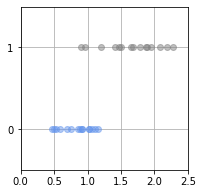

In [35]:
fig = plt.figure(figsize=(3,3))
show_data1(X, T)
plt.show()

### 6.1.2 確率で表すクラス分類

### 6.1.3 最尤推定